In [10]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from scipy.optimize import bracket, minimize_scalar


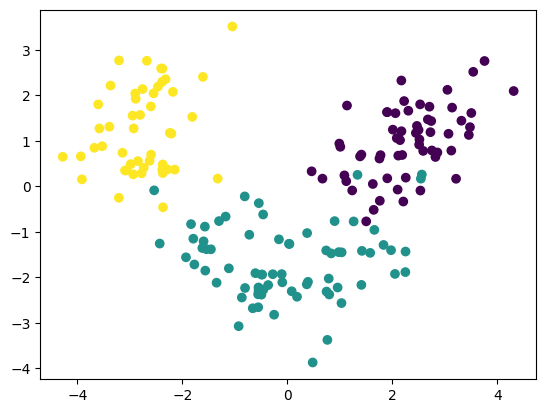

In [3]:
data = load_wine()

X_original = np.array(data['data'])
Y_original = np.array(data['target'], dtype=int)

indx = np.argsort(Y_original)
X_original = X_original[indx]
Y_original = Y_original[indx]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_original)

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=Y_original)

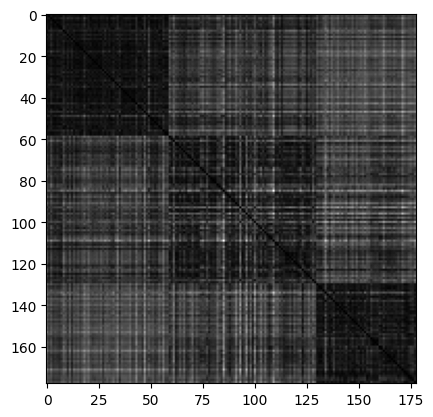

In [35]:
P = X_scaled @ X_scaled.T
D = np.diag(P).reshape(-1, 1) + np.diag(P).reshape(1, -1) - 2 * P

plt.imshow(D, cmap='gray')

In [58]:
def loss(x, D, n_bins=10):
    K = np.exp(-D / (2 * x ** 2))
    H, _ = np.histogram(K, bins=n_bins)
    H = H / H.sum()
    return np.sum(H * np.log(H + 1e-10))


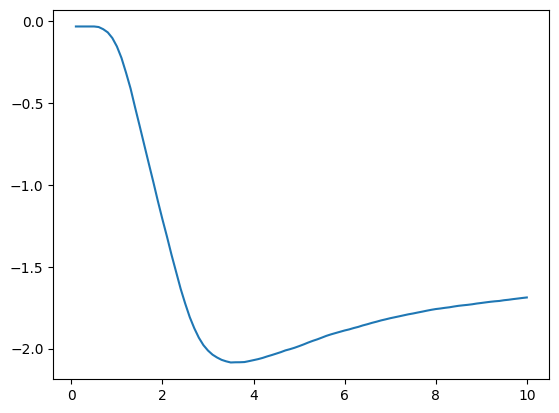

In [59]:
fun = lambda x: loss(x, D)

x = np.linspace(0.1, 10, 100)
y = [fun(x_) for x_ in x]

plt.plot(x, y)

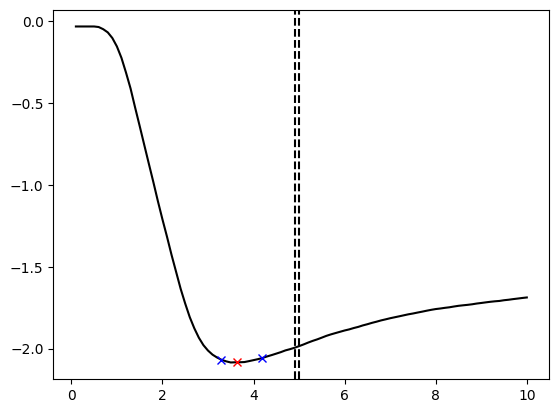

In [100]:
init_xa, init_xb = sigma2, sigma3
xa, xb, xc, fa, fb, fc, funcalls = bracket(fun, xa=init_xa, xb=init_xb)
plt.axvline(x=init_xa, color="k", linestyle="--")
plt.axvline(x=init_xb, color="k", linestyle="--")
plt.plot(x, y, "-k")
plt.plot(xa, fa, "bx")
plt.plot(xb, fb, "rx")
plt.plot(xc, fc, "bx")


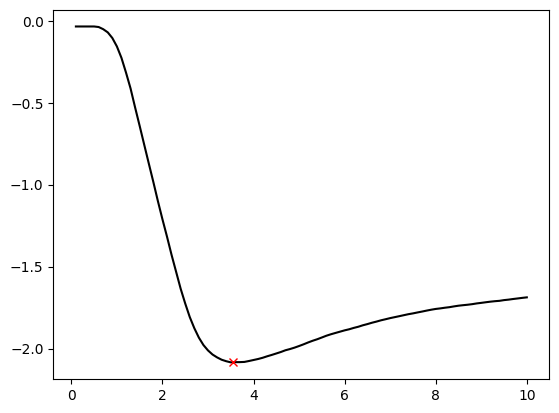

In [101]:
result = minimize_scalar(fun, bracket=(xa, xb, xc), method='brent')
plt.plot(x, y, "-k")
plt.plot(result.x, result.fun, "rx")


In [91]:
sigma1 = result.x
sigma2 = mean_distance_heuristic(X_scaled)
sigma3 = median_distance_heuristic(X_scaled)
sigma4 = scotts_bandwidth(X_scaled)

sigma1, sigma2, sigma3, sigma4


(np.float64(3.561326607961211),
 np.float64(4.906290411350801),
 np.float64(5.003513400987757),
 np.float64(0.7372628534839176))

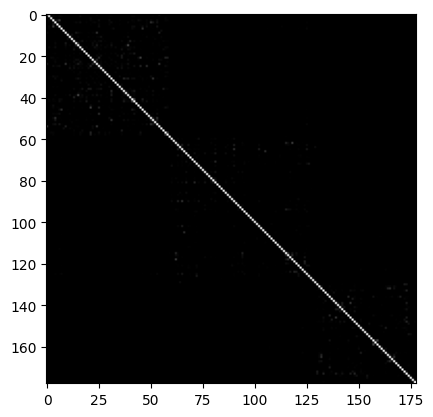

In [98]:
K = rbf_kernel_matrix(D, sigma4)
plt.imshow(K, cmap='gray')


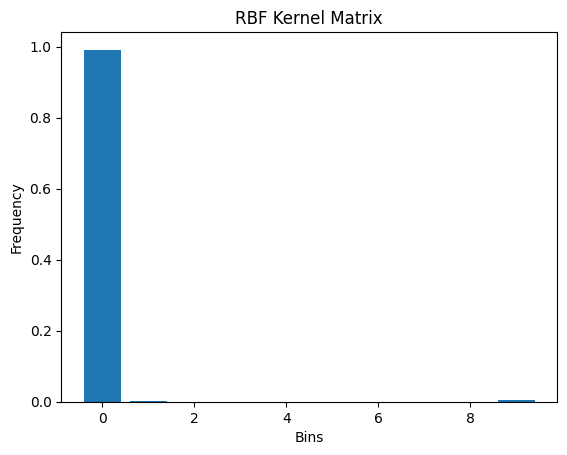

In [99]:

plot_normalized_counts(normalized_bin_distribution(K.flatten(), 10), title="RBF Kernel Matrix", xlabel="Bins", ylabel="Frequency")

In [ ]:
from scipy.spatial.distance import pdist

def median_distance_heuristic(X):
    """
    Compute the bandwidth parameter for the Gaussian kernel using the median distance heuristic.

    Parameters:
    X (numpy.ndarray): Training set in the form of a matrix of row vectors.

    Returns:
    float: Bandwidth parameter computed using the median distance heuristic.
    """
    distances = pdist(X, metric='euclidean')
    return np.median(distances)

def mean_distance_heuristic(X):
    """
    Compute the bandwidth parameter for the Gaussian kernel using the mean distance heuristic.

    Parameters:
    X (numpy.ndarray): Training set in the form of a matrix of row vectors.

    Returns:
    float: Bandwidth parameter computed using the mean distance heuristic.
    """
    distances = pdist(X, metric='euclidean')
    return np.mean(distances)

In [81]:
def scotts_bandwidth(X):
    """
    Compute the bandwidth parameter for the Gaussian kernel using Scott's rule for multidimensional data.

    Parameters:
    X (numpy.ndarray): Training set in the form of a matrix of row vectors.

    Returns:
    float: Bandwidth parameter computed using Scott's rule.
    """
    n, d = X.shape  # n: number of samples, d: number of dimensions
    std_dev = np.std(X, axis=0)  # Standard deviation along each dimension
    bandwidth = (n ** (-1 / (d + 4))) * np.mean(std_dev)  # Scott's rule formula
    return bandwidth

In [25]:
def normalized_bin_distribution(array, n_bins):
    """
    Calculate the normalized bin distribution of an array.

    Parameters:
    array (numpy.ndarray): Input array with values between 0 and 1.
    n_bins (int): Number of equally sized bins.

    Returns:
    numpy.ndarray: Normalized bin distribution.
    """
    # Compute the histogram
    counts, _ = np.histogram(array, bins=n_bins, range=(0, 1))
    
    # Normalize the counts so they sum to 1
    normalized_counts = counts / counts.sum()
    
    return normalized_counts

In [26]:
def plot_normalized_counts(normalized_counts, title="Normalized Counts", xlabel="Bins", ylabel="Frequency"):
    """
    Plot a bar graph for a vector of normalized counts.

    Parameters:
    normalized_counts (numpy.ndarray): Vector of normalized counts.
    title (str): Title of the plot.
    xlabel (str): Label for the x-axis.
    ylabel (str): Label for the y-axis.
    """
    plt.bar(range(len(normalized_counts)), normalized_counts)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [27]:
def rbf_kernel_matrix(pairwise_squared_distances, bandwidth):
    """
    Compute the RBF kernel matrix.

    Parameters:
    pairwise_squared_distances (numpy.ndarray): Matrix of pairwise squared distances.
    bandwidth (float): Bandwidth parameter for the RBF kernel.

    Returns:
    numpy.ndarray: RBF kernel matrix.
    """
    return np.exp(-pairwise_squared_distances / (2 * bandwidth ** 2))

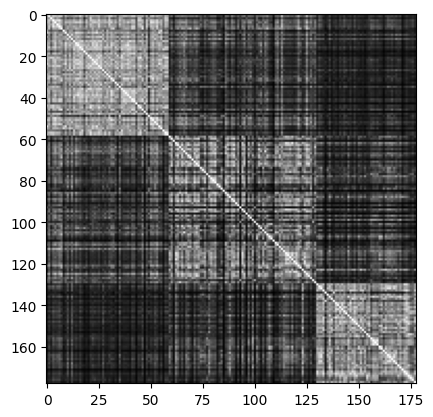

In [67]:
K = rbf_kernel_matrix(D, 3)
plt.imshow(K, cmap='gray')

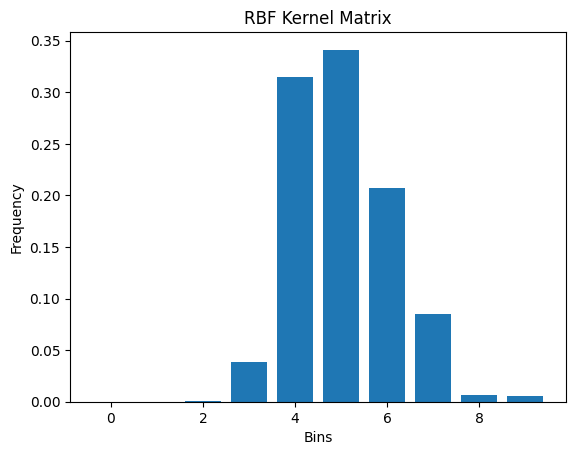

In [34]:

plot_normalized_counts(normalized_bin_distribution(K.flatten(), 10), title="RBF Kernel Matrix", xlabel="Bins", ylabel="Frequency")

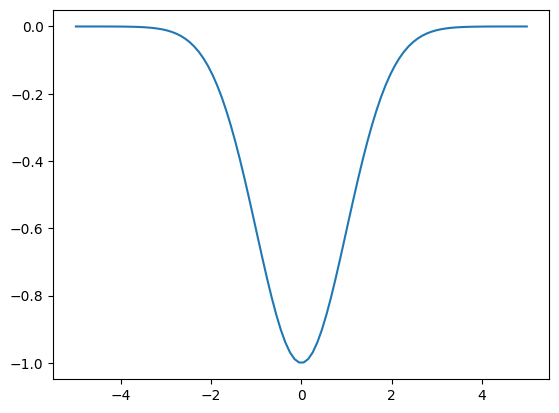

In [9]:
f = lambda x: -np.exp(-x ** 2 / 2)
x = np.linspace(-5, 5, 100)
y = f(x)
plt.plot(x, y)

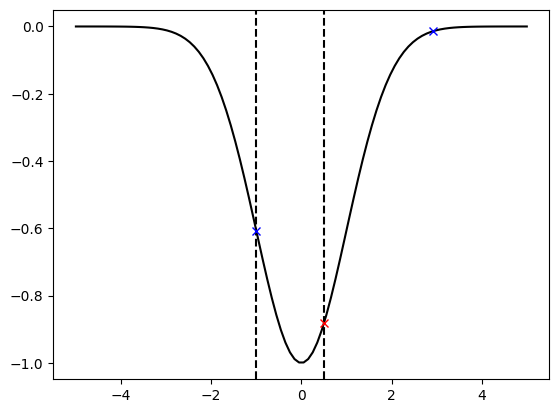

In [17]:
init_xa, init_xb = -1.0, 0.5
xa, xb, xc, fa, fb, fc, funcalls = bracket(f, xa=init_xa, xb=init_xb)
plt.axvline(x=init_xa, color="k", linestyle="--")
plt.axvline(x=init_xb, color="k", linestyle="--")
plt.plot(x, y, "-k")
plt.plot(xa, fa, "bx")
plt.plot(xb, fb, "rx")
plt.plot(xc, fc, "bx")


In [18]:
xa, xb, xc, fa, fb, fc,

(np.float64(-1.0),
 np.float64(0.5),
 np.float64(2.927051),
 np.float64(-0.6065306597126334),
 np.float64(-0.8824969025845955),
 np.float64(-0.013789969784439027))

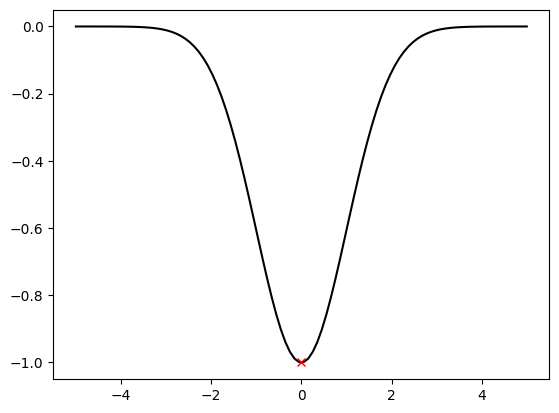

In [19]:
result = minimize_scalar(f, bracket=(xa, xb, xc), method='brent')
plt.plot(x, y, "-k")
plt.plot(result.x, result.fun, "rx")


In [20]:
result

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: -1.0
       x: -1.2075105118905433e-09
     nit: 17
    nfev: 20